**Law of Large Numbers exercise (2D variable Z = (X, Y)) :**

- X: Temperature in °C ~ Normal(mu=20, sigma=5)
- Y: Wind speed in m/s ~ Exponential(scale=3) (mean = 3 m/s)

We'll compute the theoretical expected value, sample points, plot them, and show convergence of the empirical average to the expected value.

In [60]:
#!/usr/bin/env python3
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)

**Part 1: define distributions and sample**

In [61]:
# Parameters for the distributions (meaningful units)
mu_x = 20.0        # °C
sigma_x = 5.0      # °C (std dev)
scale_y = 3.0      # m/s (exponential scale -> mean = 3 m/s)

# Theoretical expected value (finite)
E_X = mu_x
E_Y = scale_y
E_Z = np.array([E_X, E_Y])

# Sampling
N_total = 5000        # total number of samples to draw for the experiment
x = np.random.normal(mu_x, sigma_x, N_total)    # temperatures (°C)
y = np.random.exponential(scale_y, N_total)         # wind speeds (m/s)

Z = np.vstack((x, y)).T  # shape (N_total, 2)

print(Z.shape)  # should be (N_total, 2)
print(Z[:5])     # print first 5 samples

(5000, 2)
[[22.48357077  0.55262169]
 [19.30867849  0.63192141]
 [23.23844269  1.85251754]
 [27.61514928  1.01179307]
 [18.82923313  0.85291527]]


**Part 2: pick a sample size n0 to plot the points**

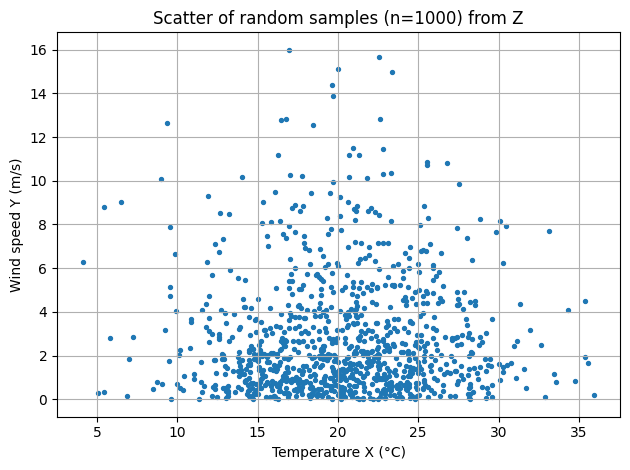

In [62]:
n0 = 1000  # number of points to visualize (scatter)

# Randomly select n0 samples from Z for plotting
Z_plot = Z[np.random.choice(Z.shape[0], n0, replace=False)]

# Scatter plot of the first n0 samples
plt.scatter(Z_plot[:,0], Z_plot[:,1], s=8)
plt.xlabel("Temperature X (°C)")
plt.ylabel("Wind speed Y (m/s)")
plt.title(f"Scatter of random samples (n={n0}) from Z")
plt.grid(True)
plt.tight_layout()
plt.show()

**Part 3: empirical averages for increasing n and distances to E[Z]**

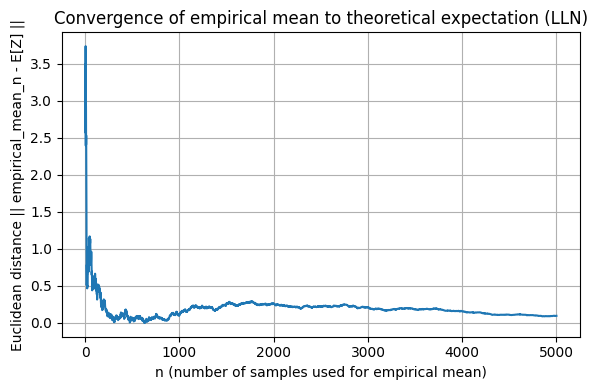

Theoretical expected value E[Z] = (E[X], E[Y]) = (°C, m/s): [20.  3.]
Empirical mean at final n = 5000 : [20.02800965  2.90746215]
Euclidean distance at final n: 0.0966839870116386

Note: E[Z] is a theoretical value (vector). The empirical mean is a random vector computed from samples.


In [63]:
cum_sum = np.cumsum(Z, axis=0)
indices = np.arange(1, N_total + 1)
empirical_means = cum_sum / indices[:, None]  # shape (N_total, 2)

# Euclidean distance between empirical mean and theoretical E[Z] for each n
distances = np.linalg.norm(empirical_means - E_Z, axis=1)

# Plot distance vs n
plt.figure(figsize=(6,4))
plt.plot(indices, distances)
plt.xlabel("n (number of samples used for empirical mean)")
plt.ylabel("Euclidean distance || empirical_mean_n - E[Z] ||")
plt.title("Convergence of empirical mean to theoretical expectation (LLN)")
plt.grid(True)
plt.tight_layout()
plt.show()

# Print final diagnostics
print("Theoretical expected value E[Z] = (E[X], E[Y]) = (°C, m/s):", E_Z)
print("Empirical mean at final n =", N_total, ":", empirical_means[-1])
print("Euclidean distance at final n:", distances[-1])
print("\nNote: E[Z] is a theoretical value (vector). The empirical mean is a random vector computed from samples.")